<h1 align="center"> ELO Ranking for professional Dota team</h1>

<h2 align="center"> Shangai Major Invitation 2016</h2>

In [1]:
# Some import
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

plt.style.use('ggplot')

<h2> Elo funtion and class</h2>

In [2]:
# Elo formula 
# R=R+KG(W-We)
# R = Elo rank
# K = Weight of competition
# G = coefficient according to the result

def compute_elo(Team1, Team2 ,score1, score2 ,Tournament):
    elo1 = Team1.elo 
    elo2 = Team2.elo 
    k = Tournament.weight
    We1 = 1/(1+10**(-(elo1-elo2)/400))
    We2 = 1/(1+10**(-(elo2-elo1)/400))
    
    if(score1==score2):
        elo1 = elo1 + k * 1 *(0.5-We1)
        elo2 = elo2 + k * 1 *(0.5-We2)
    elif(score1>score2+1):
        elo1 = elo1 + k * 1.5 *(1-We1)
        elo2 = elo2 - k * 1.5 *(We2)
    elif(score1>score2):
        elo1 = elo1 + k * 1 *(1-We1)
        elo2 = elo2 - k * 1 *(We2)
    elif(score2>score1+1):
        elo1 = elo1 - k * 1.5 *(We1)
        elo2 = elo2 + k * 1.5 *(1-We2)
    elif(score2>score1):
        elo1 = elo1 - k * 1 *(We1)
        elo2 = elo2 + k * 1 *(1-We2)
    
    Team1.elo = round(elo1)
    Team2.elo = round(elo2)

def display_rank(List_team):
    l =[]
    for team in List_team:
        l.append([team.name,team.elo,team.major,team.tournament])
    df =pd.DataFrame(data=l, columns=["team","Rank", "Major", "Tournament"])
    return df.sort_values(by="Rank", ascending=0).reset_index(drop=True)

In [3]:
class Team:
    def __init__(self,name, elo=1000, major=0, tournament=0,invited=False,place="17"):
        self.elo = elo
        self.name = name
        self.major = major
        self.tournament = tournament
        self.invited=invited
        self.place=place
        
    
class Tournament:
        def __init__(self,name, weight):
            self.weight = weight
            self.name = name

### Weight of tournament
* The International: 60
* Major: 50
* Cash price >200k: 30
* Cash price >100k & <200k: 20
* Cash price <100K: 10

<h2>The Frankfurt Major</h2>


In [4]:
# Create Tournament
Frankfurt_major = Tournament("The Fankfurt Major 2015",50)


Vici_Gaming = Team("Vici Gaming", 1000,invited=True,place="5-6")
Evil_Geniuses  = Team("Evil Geniuses", 1000, invited=True,place="3")
Team_Secret  = Team("Team Secret", 1000,invited=True,place="2")
LGD_Gaming  = Team("LGD Gaming", 1000,place="7-8")
Cloud_9  = Team("Cloud 9", 1000,place="13-16")
Virtus_pro  = Team("Virtus Pro", 1000,invited=True,place="7-8")
Newbee  = Team("Newbee", 1000,place="13-16")
Fnatic  = Team("Fnatic", 1000,place="13-16")
CDEC_Gaming = Team("CDEC Gaming", 1000,invited=True,place="5-6")
Ehome  = Team("EHOME", 1000, invited = True,place="4")
Alliance = Team("Alliance",1000,invited=True,place="9-12")
Unknown = Team("Team Unknown",1000,place="9-12")
NewbeeY = Team("Newbee Young",1000,place="13-16")
OG = Team("OG",1000, invited=True,place="1")
Vega_Squadron=Team("Vega Squadron",1000,place="9-12")
Mineski = Team("Mineski",1000,place="9-12")

List_team = [Vici_Gaming,Evil_Geniuses,Team_Secret,LGD_Gaming,Cloud_9,Virtus_pro,Newbee,Fnatic
             ,CDEC_Gaming,Ehome,Mineski, Alliance, Unknown, NewbeeY, OG, Vega_Squadron]


In [5]:
# Group stage
compute_elo(Evil_Geniuses, Fnatic,2,1,Frankfurt_major)
compute_elo(Virtus_pro, Newbee,2,0,Frankfurt_major)
compute_elo(Evil_Geniuses, Virtus_pro,2,1,Frankfurt_major)
compute_elo(Newbee, Fnatic,2,0,Frankfurt_major)
compute_elo(Virtus_pro, Newbee,2,0,Frankfurt_major)

compute_elo(Vici_Gaming, Unknown,2,0,Frankfurt_major)
compute_elo(Vega_Squadron, OG,2,1,Frankfurt_major)
compute_elo(Vici_Gaming, Vega_Squadron,2,1,Frankfurt_major)
compute_elo(OG, Unknown,2,0,Frankfurt_major)
compute_elo(Vega_Squadron, OG,2,1,Frankfurt_major)

compute_elo(Team_Secret, NewbeeY,2,0,Frankfurt_major)
compute_elo(LGD_Gaming, Cloud_9,2,1,Frankfurt_major)
compute_elo(Team_Secret, LGD_Gaming,2,0,Frankfurt_major)
compute_elo(Cloud_9, NewbeeY,2,1,Frankfurt_major)
compute_elo(LGD_Gaming, Cloud_9,2,0,Frankfurt_major)

compute_elo(Ehome, Alliance,2,0,Frankfurt_major)
compute_elo(CDEC_Gaming, Mineski,2,1,Frankfurt_major)
compute_elo(Ehome, CDEC_Gaming,0,2,Frankfurt_major)
compute_elo(Mineski, Alliance,2,0,Frankfurt_major)
compute_elo(Ehome, Mineski,0,2,Frankfurt_major)

# Play-off

compute_elo(Evil_Geniuses, Vega_Squadron,2,1,Frankfurt_major)
compute_elo(CDEC_Gaming, LGD_Gaming,2,0,Frankfurt_major)
compute_elo(Team_Secret, Mineski,2,0,Frankfurt_major)
compute_elo(Vici_Gaming, Virtus_pro,2,1,Frankfurt_major)
compute_elo(Team_Secret, Vici_Gaming,2,1,Frankfurt_major)
compute_elo(Evil_Geniuses, CDEC_Gaming,2,0,Frankfurt_major)
compute_elo(Team_Secret, Evil_Geniuses,2,1,Frankfurt_major)

compute_elo(Alliance, Cloud_9,1,0,Frankfurt_major)
compute_elo(OG, Fnatic,1,0,Frankfurt_major)
compute_elo(Unknown, Newbee,1,0,Frankfurt_major)
compute_elo(Ehome, NewbeeY,1,0,Frankfurt_major)
compute_elo(Virtus_pro, Alliance,2,0,Frankfurt_major)
compute_elo(OG, Mineski,2,0,Frankfurt_major)
compute_elo(LGD_Gaming, Unknown,2,0,Frankfurt_major)
compute_elo(Ehome, Vega_Squadron,2,0,Frankfurt_major)
compute_elo(OG, Virtus_pro,2,1,Frankfurt_major)
compute_elo(Ehome, LGD_Gaming,2,1,Frankfurt_major)
compute_elo(OG, CDEC_Gaming,2,0,Frankfurt_major)
compute_elo(Ehome, Vici_Gaming,2,0,Frankfurt_major)
compute_elo(OG, Ehome,2,1,Frankfurt_major)
compute_elo(OG, Evil_Geniuses,2,1,Frankfurt_major)

# Grand final
compute_elo(Team_Secret, OG,1,3,Frankfurt_major)

OG.major=1
OG.elo+=Frankfurt_major.weight

In [6]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,OG,1240,1,0
1,Team Secret,1118,0,0
2,Evil Geniuses,1068,0,0
3,EHOME,1065,0,0
4,Virtus Pro,1028,0,0
5,Vici Gaming,1024,0,0
6,CDEC Gaming,1022,0,0
7,LGD Gaming,1002,0,0
8,Mineski,974,0,0
9,Vega Squadron,965,0,0


<h2>Game Show Global eSports Cup Season 1</h2>


In [7]:
# Create Tournament
GSB_S1 = Tournament("Game Show Global eSports Cup Season 1",30)

# Introducing now teams
Four_CL = Team("4 Clover & Lepricon",1000)
Team_Empire = Team("Team Empire",1000)
MVP_Phoenix=Team("MVP Phoenix",1000)
List_team.append(Four_CL)
List_team.append(Team_Empire)
List_team.append(MVP_Phoenix)

In [8]:
compute_elo(Four_CL, MVP_Phoenix,2,0,GSB_S1)
compute_elo(Team_Empire, Vega_Squadron,2,0,GSB_S1)
compute_elo(Team_Empire, Four_CL,2,1,GSB_S1)
compute_elo(Vega_Squadron, MVP_Phoenix,2,0,GSB_S1)
compute_elo(Four_CL, Vega_Squadron,2,0,GSB_S1)
compute_elo(Team_Empire, Four_CL,3,1,GSB_S1)

Team_Empire.tournament+=1
Team_Empire.elo+=GSB_S1.weight

In [9]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,OG,1240,1,0
1,Team Secret,1118,0,0
2,Team Empire,1087,0,1
3,Evil Geniuses,1068,0,0
4,EHOME,1065,0,0
5,Virtus Pro,1028,0,0
6,Vici Gaming,1024,0,0
7,CDEC Gaming,1022,0,0
8,4 Clover & Lepricon,1005,0,0
9,LGD Gaming,1002,0,0


<h2>The Summit 4</h2>


In [10]:
# Create Tournament
TS4 = Tournament("The Summit 4",20)

# Introducing new team
Team_Liquid=Team("Team Liquid",1000)
List_team.append(Team_Liquid)
Digital_Chaos=Team("Digital Chaos",1000)
List_team.append(Digital_Chaos)

In [11]:
# Play-off
compute_elo(OG, Mineski,2,0,TS4)
compute_elo(Vici_Gaming, Virtus_pro,2,1,TS4)
compute_elo(Team_Liquid, Ehome,2,1,TS4)
compute_elo(Evil_Geniuses, Digital_Chaos,2,1,TS4)
compute_elo(Vici_Gaming, OG,2,1,TS4)
compute_elo(Evil_Geniuses, Team_Liquid,2,1,TS4)
compute_elo(Evil_Geniuses, Vici_Gaming,2,1,TS4)
compute_elo(Virtus_pro, Mineski,2,0,TS4)
compute_elo(Ehome, Digital_Chaos,2,1,TS4)
compute_elo(Virtus_pro, Team_Liquid,2,1,TS4)
compute_elo(OG, Ehome,2,1,TS4)
compute_elo(Virtus_pro, OG,2,0,TS4)
compute_elo(Virtus_pro, Vici_Gaming,2,0,TS4)
compute_elo(Evil_Geniuses, Virtus_pro,3,2,TS4)

Evil_Geniuses.tournament+=1
Evil_Geniuses.elo+=TS4.weight

In [12]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,OG,1212,1,0
1,Evil Geniuses,1123,0,1
2,Team Secret,1118,0,0
3,Team Empire,1087,0,1
4,Virtus Pro,1067,0,0
5,EHOME,1056,0,0
6,Vici Gaming,1026,0,0
7,CDEC Gaming,1022,0,0
8,4 Clover & Lepricon,1005,0,0
9,LGD Gaming,1002,0,0


<h2>ASUS ROG DreamLeague Season 4</h2>


In [13]:
# Create Tournament
DL_S4 = Tournament("ASUS ROG DreamLeague Season 4",20)

In [14]:
# Play-off
compute_elo(Four_CL, Alliance,2,0,DL_S4)
compute_elo(OG, Team_Empire,2,0,DL_S4)
compute_elo(OG, Four_CL,2,0,DL_S4)
compute_elo(Team_Empire, Alliance,2,0,DL_S4)
compute_elo(Team_Empire, Four_CL,3,1,DL_S4)
compute_elo(OG, Team_Empire,3,0,DL_S4)

OG.tournament+=1
OG.elo+=DL_S4.weight

In [15]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,OG,1259,1,1
1,Evil Geniuses,1123,0,1
2,Team Secret,1118,0,0
3,Team Empire,1087,0,1
4,Virtus Pro,1067,0,0
5,EHOME,1056,0,0
6,Vici Gaming,1026,0,0
7,CDEC Gaming,1022,0,0
8,LGD Gaming,1002,0,0
9,4 Clover & Lepricon,998,0,0


<h2>The Defense Season 5</h2>


In [16]:
# Create Tournament
TD_S5 = Tournament("The Defense Season 5",10)

# Introducing now teams
Alternate = Team("Team Alternate",1000)
List_team.append(Alternate)

In [17]:
# Play-off
compute_elo(OG, Alternate,2,0,TD_S5)
compute_elo(Team_Liquid, Alliance,2,1,TD_S5)
compute_elo(OG, Team_Liquid,2,0,TD_S5)
compute_elo(Alliance, Alternate,2,0,TD_S5)
compute_elo(Team_Liquid, Alliance,2,0,TD_S5)
compute_elo(Team_Liquid, OG,3,1,TD_S5)

Team_Liquid.tournament+=1
Team_Liquid.elo+=TD_S5.weight

In [18]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,OG,1253,1,1
1,Evil Geniuses,1123,0,1
2,Team Secret,1118,0,0
3,Team Empire,1087,0,1
4,Virtus Pro,1067,0,0
5,EHOME,1056,0,0
6,Vici Gaming,1026,0,0
7,Team Liquid,1024,0,1
8,CDEC Gaming,1022,0,0
9,LGD Gaming,1002,0,0


<h2>World Cyber Arena 2015</h2>


In [19]:
# Create Tournament
WCA_2015 = Tournament("World Cyber Arena 2015",30)

# Introducing now teams
TNC_Gaming = Team("TNC Gaming",1000)
List_team.append(TNC_Gaming)
Wings_Gaming = Team("Wings Gaming",1000)
List_team.append(Wings_Gaming)
Team_Leviathan = Team("Team Leviathan",1000)
List_team.append(Team_Leviathan)
Team_YP = Team("Team Youporn",1000)
List_team.append(Team_YP)
Execration = Team("Execration",1000)
List_team.append(Execration)
Invictus_Gaming = Team("Invictus Gaming",1000)
List_team.append(Execration)

In [20]:
# Group stage
compute_elo(Wings_Gaming, Team_Secret,2,0,WCA_2015)
compute_elo(Fnatic, Team_Empire,1,1,WCA_2015)
compute_elo(Team_Secret, Fnatic,2,0,WCA_2015)
compute_elo(Team_Empire, Wings_Gaming,1,1,WCA_2015)
compute_elo(Team_Empire, Team_Secret,2,0,WCA_2015)
compute_elo(Wings_Gaming, Fnatic,1,1,WCA_2015)

compute_elo(Team_Leviathan, Team_YP,2,0,WCA_2015)
compute_elo(LGD_Gaming, Team_YP,2,0,WCA_2015)
compute_elo(LGD_Gaming, Team_Leviathan,2,0,WCA_2015)

compute_elo(CDEC_Gaming, TNC_Gaming,1,1,WCA_2015)
compute_elo(Invictus_Gaming, Execration,2,0,WCA_2015)
compute_elo(CDEC_Gaming, Invictus_Gaming,1,1,WCA_2015)
compute_elo(TNC_Gaming, Execration,1,1,WCA_2015)
compute_elo(CDEC_Gaming, Execration,2,0,WCA_2015)
compute_elo(TNC_Gaming, Invictus_Gaming,2,0,WCA_2015)

compute_elo(Alliance, MVP_Phoenix,2,0,WCA_2015)
compute_elo(Team_Liquid, Digital_Chaos,1,1,WCA_2015)
compute_elo(Alliance, Digital_Chaos,1,1,WCA_2015)
compute_elo(Team_Liquid, MVP_Phoenix,2,0,WCA_2015)
compute_elo(Team_Liquid, Alliance,2,0,WCA_2015)
compute_elo(MVP_Phoenix, Digital_Chaos,2,0,WCA_2015)

# Play-off
compute_elo(Wings_Gaming, Team_Leviathan,2,0,WCA_2015)
compute_elo(Alliance, CDEC_Gaming,2,1,WCA_2015)
compute_elo(LGD_Gaming, Team_Empire,2,1,WCA_2015)
compute_elo(Team_Liquid, TNC_Gaming,2,0,WCA_2015)
compute_elo(Alliance, Wings_Gaming,2,0,WCA_2015)
compute_elo(LGD_Gaming, Team_Liquid,2,0,WCA_2015)
compute_elo(Team_Liquid, Wings_Gaming,3,0,WCA_2015)
compute_elo(Alliance, LGD_Gaming,3,2,WCA_2015)

Alliance.tournament+=1
Alliance.elo+=WCA_2015.weight

In [21]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,OG,1253,1,1
1,Evil Geniuses,1123,0,1
2,Team Empire,1085,0,1
3,Team Secret,1076,0,0
4,Team Liquid,1072,0,1
5,Virtus Pro,1067,0,0
6,LGD Gaming,1065,0,0
7,EHOME,1056,0,0
8,Vici Gaming,1026,0,0
9,CDEC Gaming,1021,0,0


<h2>Dota 2 Radiant & Dire Cup 2015</h2>


In [22]:
# Create Tournament
RandD_Cup_2015 = Tournament("Dota 2 Radiant & Dire Cup 2015",20)

# Introducing now teams
FanTuan = Team("Team_FanTuan",1000)
List_team.append(FanTuan)
CDEC_Youth = Team("CDEC Youth",1000)
List_team.append(CDEC_Youth)
IG_Vitality = Team("IG VItality",1000)
List_team.append(IG_Vitality)

In [23]:
# Play-off
compute_elo(Vici_Gaming, NewbeeY,2,0,RandD_Cup_2015)
compute_elo(LGD_Gaming, IG_Vitality,2,0,RandD_Cup_2015)
compute_elo(CDEC_Youth, Ehome,2,1,RandD_Cup_2015)
compute_elo(CDEC_Gaming, FanTuan,2,0,RandD_Cup_2015)
compute_elo(Vici_Gaming, LGD_Gaming,2,0,RandD_Cup_2015)
compute_elo(CDEC_Youth, CDEC_Gaming,2,0,RandD_Cup_2015)
compute_elo(CDEC_Youth, Vici_Gaming,2,1,RandD_Cup_2015)
compute_elo(IG_Vitality, NewbeeY,1,0,RandD_Cup_2015)
compute_elo(Ehome, FanTuan,1,0,RandD_Cup_2015)
compute_elo(IG_Vitality, CDEC_Gaming,1,0,RandD_Cup_2015)
compute_elo(Ehome, LGD_Gaming,1,0,RandD_Cup_2015)
compute_elo(Ehome, IG_Vitality,1,0,RandD_Cup_2015)
compute_elo(Ehome, CDEC_Youth,2,1,RandD_Cup_2015)

Ehome.tournament+=1
Ehome.elo+=RandD_Cup_2015.weight

In [24]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,OG,1253,1,1
1,Evil Geniuses,1123,0,1
2,EHOME,1099,0,1
3,Team Empire,1085,0,1
4,Team Secret,1076,0,0
5,Team Liquid,1072,0,1
6,Virtus Pro,1067,0,0
7,LGD Gaming,1050,0,0
8,Vici Gaming,1042,0,0
9,CDEC Youth,1030,0,0


<h2>ECL Autumn 2015</h2>


In [25]:
# Create Tournament
ECL_Auttumn_2015 = Tournament("ECL Autumn 2015",10)

# Introducing new teams
FTD_Club_B = Team("FTD Club B",1000)
List_team.append(FTD_Club_B)


In [26]:
compute_elo(CDEC_Gaming,FTD_Club_B,2,1,ECL_Auttumn_2015)
compute_elo(CDEC_Youth,Invictus_Gaming,2,0,ECL_Auttumn_2015)
compute_elo(Invictus_Gaming,FTD_Club_B,2,0,ECL_Auttumn_2015)
compute_elo(CDEC_Gaming,CDEC_Youth,2,0,ECL_Auttumn_2015)

CDEC_Gaming.tournament+=1
CDEC_Gaming.elo+=ECL_Auttumn_2015.weight

In [27]:
display_rank(List_team)

,team,Rank,Major,Tournament
0,OG,1253,1,1
1,Evil Geniuses,1123,0,1
2,EHOME,1099,0,1
3,Team Empire,1085,0,1
4,Team Secret,1076,0,0
5,Team Liquid,1072,0,1
6,Virtus Pro,1067,0,0
7,LGD Gaming,1050,0,0
8,Vici Gaming,1042,0,0
9,CDEC Gaming,1031,0,1


## Conclusion

The invitation was realeased the 31th december with 8 team which are:
* OG
* Ehome
* Evil Geniuses
* Alliance
* CDEC Gaming
* Virtus Pro
* Team Secret
* Vici Gaming

Teams with highest score are: 

* OG  
* EHOME  
* Team Secret  
* Evil Geniuses  
* LGD Gaming  
* Virtus Pro
* Vici Gaming  
* Team Empire  


In [28]:
l=[]
for team in List_team:
    l.append([team.name,team.elo,team.major,team.tournament,team.invited,team.place])
df =pd.DataFrame(data=l, columns=["team","Rank", "Major", "Tournament", "Invited",'place'])

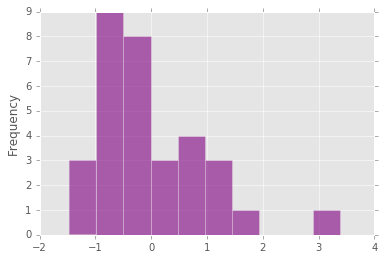

In [29]:
mean=df.Rank.mean()
std = df.Rank.std()
df["norm_elo"]=np.around((df.Rank-mean)/std, decimals=2)
df.norm_elo.plot.hist(alpha=0.6, color="purple")

In [30]:
df.to_csv("data/winter_2016.csv")

In [31]:
df.sort_values(by="Rank", ascending=0).reset_index(drop=True)

,team,Rank,Major,Tournament,Invited,place,norm_elo
0,OG,1253,1,1,True,1,3.39
1,Evil Geniuses,1123,0,1,True,3,1.62
2,EHOME,1099,0,1,True,4,1.29
3,Team Empire,1085,0,1,False,17,1.10
4,Team Secret,1076,0,0,True,2,0.97
5,Team Liquid,1072,0,1,False,17,0.92
6,Virtus Pro,1067,0,0,True,7-8,0.85
7,LGD Gaming,1050,0,0,False,7-8,0.62
8,Vici Gaming,1042,0,0,True,5-6,0.51
9,CDEC Gaming,1031,0,1,True,5-6,0.36


## Conclusion

The invitation was realeased the 31th december with 8 team which are:
* OG
* Ehome
* Evil Geniuses
* Alliance
* CDEC Gaming
* Virtus Pro
* Team Secret
* Vici Gaming

Teams with highest score are: 

* OG  
* EHOME  
* Team Secret  
* Evil Geniuses  
* LGD Gaming  
* Virtus Pro
* Vici Gaming  
* Team Empire  
